# Aligning images for Eclipse timelapse
---

* Idea for script base on [this post](https://labjg.wordpress.com/2013/04/01/aligning-sun-images-using-python/)
* Worked for about 2k images where sun was in full view. Fixed rotation was enough. Doing a search for ideal rotation on each image would have been better but expensive and unnecessary. 
* Images during totality (about 20) were aligned by hand. 
* Timelapse assembly using [Time Lapse Assembler](http://www.dayofthenewdan.com/projects/time-lapse-assembler-1/)
* Ripping to various formats in the venerable [HandBrake](http://handbrake.m0k.org)


## Final timelapse:
---

In [7]:
from IPython.display import HTML

HTML("""<iframe width="640" height="360" 
src="https://www.youtube.com/embed/QUSP2YjmIKo?
rel=0&amp;controls=0&amp;showinfo=0" 
frameborder="0" allowfullscreen></iframe>""")

## Script
---

In [52]:
from PIL import Image
import numpy as np
import os, sys
from PIL import Image, ImageOps

## First let's try simple geometry just assuming diagonal
We'll find the size of the sun (XX pixels), then assume the left bounding box corner is always in left bottom or top right, and draw the box based on that

### Find size of sun

In [53]:
target = Image.open("/Users/timothysennott/Desktop/Eclipse/EOS-test/IN/IMG_7001.JPG")

In [54]:
def thresh(x): #zero threshold for cropping around sun
    if x < 250:
        x = 0
    return x

def bbcrop(image):
    box1 = image.point(thresh).getbbox()
    return image.crop(box1)

In [55]:
cropped = bbcrop(target)

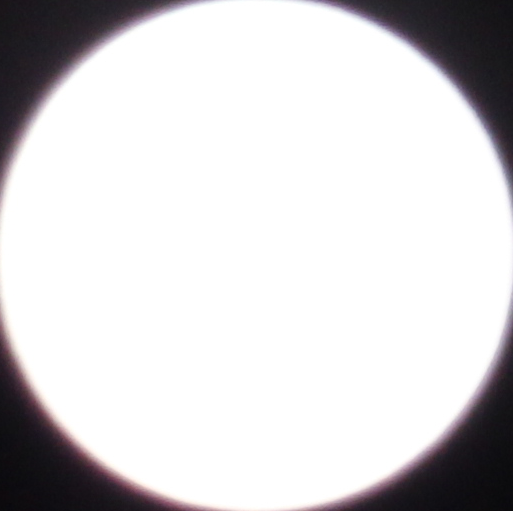

In [56]:
cropped

In [57]:
cropped.size

(513, 511)

OK, so it's 512 by 512 say

### Now crop into box based on sun size

In [58]:
target = Image.open("/Users/timothysennott/Desktop/Eclipse/EOS-test/IN/IMG_7801.JPG")

In [59]:
cropped = bbcrop(target)

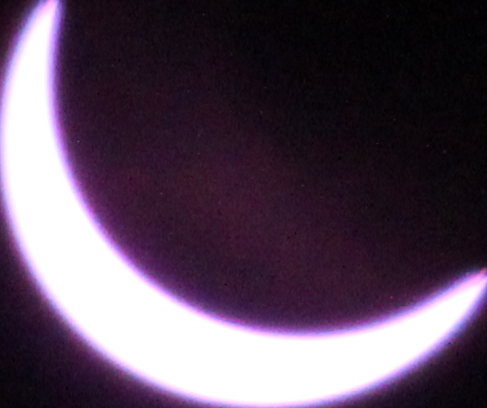

In [60]:
cropped

In [61]:
cropped.size

(487, 408)

In [62]:
def thresh(x): #zero threshold for cropping around sun
    if x < 250:
        x = 0
    return x

def bbcrop(image):
    box1 = image.point(thresh).getbbox()
    width = 512
    height = 512
    left = box1[0]
    top = box1[3]
    box2 = (left, top - height, left + width, top)
    return image.crop(box2)

In [63]:
cropped = bbcrop(target)

In [64]:
cropped.size

(512, 512)

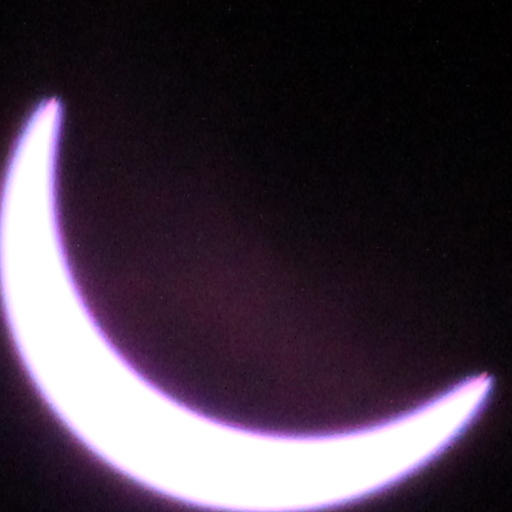

In [65]:
cropped

OK, so that seems to work, let's try it

## OK, let's try rotating for slightly better performance

First, find rough angle

In [66]:
def thresh(x): #zero threshold for cropping around sun
    if x < 250:
        x = 0
    return x

def bbcrop(image):
    box1 = image.point(thresh).getbbox()
    return image.crop(box1)

In [67]:
target = Image.open("/Users/timothysennott/Desktop/Eclipse/EOS-test/IN/IMG_7801.JPG").rotate(-12.5, expand=True)

In [68]:
cropped = bbcrop(target)

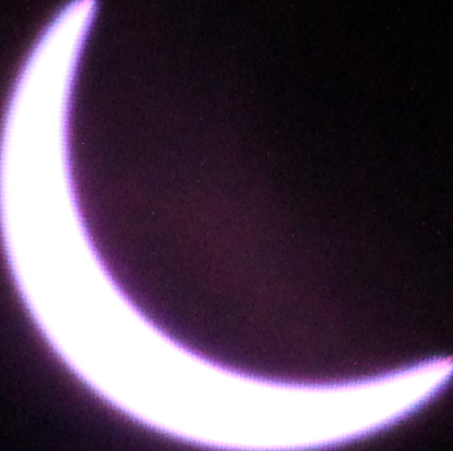

In [69]:
cropped

In [70]:
cropped.size

(453, 451)

But the rotation will be dynamic...

In [71]:
target = Image.open("/Users/timothysennott/Desktop/Eclipse/EOS-test/IN/IMG_7880.JPG").rotate(-9.5, expand=True)

In [72]:
cropped = bbcrop(target)

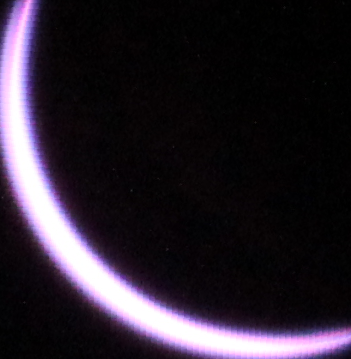

In [73]:
cropped

In [74]:
cropped.size

(351, 359)

OK, maybe not...seems like 9-13 deg, let's call it 10

## Wow that seems to work, let's try it for the batch
...in fact we can do it all in a batch with a rotation for the post totality

In [75]:
def thresh(x): #zero threshold for cropping around sun
    if x < 250:
        x = 0
    return x

def bbcrop(image,size):
    
    box1 = image.point(thresh).getbbox()
    
    width = 512
    height = 512
    left = box1[0]
    top = box1[3]
    box2 = (left, top - height, left + width, top)
        
    left = box2[0]-(size[0]-width)/2
    top = box2[1]-(size[1]-height)/2
    box3 = (left, top , left + size[0] , top + size[1])
    
    return image.crop(box3)

In [76]:
#based on suncrop.py
import os, sys#, sun
from PIL import Image

print ("starting")
for i in range(7010,7896)+range(7925,9186): #image index range
#for i in range(7890,7896)+range(7925,7930): #image index range
#for i in range(9143,9186):

    infile = "/Users/timothysennott/Desktop/Eclipse/EOS-test/IN/IMG_%04d.JPG" % i
    outfile = "/Users/timothysennott/Desktop/Eclipse/EOS-test/CROP_TEST_1920_FINAL/IMG_%04d.JPG" % i

    if i < 7900:
        im = Image.open(infile).rotate(-11, expand=True)
    else:
        im = Image.open(infile).rotate(-11+180, expand=True)

    #print "Finding sun..."
    imtrim = bbcrop(im, (2880,1620))

    #print "Saving to %s" % outfile
    if i < 7900:
        imtrim.save(outfile)
    else:
        imtrim.rotate(180).save(outfile)
    print("%04d," %i),
                                
print "\nDone!\n"

starting
7010, 7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021, 7022, 7023, 7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042, 7043, 7044, 7045, 7046, 7047, 7048, 7049, 7050, 7051, 7052, 7053, 7054, 7055, 7056, 7057, 7058, 7059, 7060, 7061, 7062, 7063, 7064, 7065, 7066, 7067, 7068, 7069, 7070, 7071, 7072, 7073, 7074, 7075, 7076, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7091, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7120, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7128, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7147, 7148, 7149, 7150, 7151, 7152, 7153, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7

# OK, so that worked well!!


## Working notes
### Frames

* Blank frames: to 7898 to 7905
* Last totality frame 7914
* Black frames: 9186 to 9189

### Thresholds
* For solid shots, 250 is good threshold
* CURRENTLY MISSING: 7896-7
* MANUAL 7896-7, 7906-24
